In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [37]:
data= pd.read_csv('diabetes.csv')

In [38]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

no null values in the data,but some of the values are missing in it.

In [41]:
data.apply(lambda x: sum(x==0),axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

so, here in the data missing values are '0''s ,so we have to replace them with mean values of the corresponding columns

In [42]:
data['SkinThickness'].replace(0,np.NaN,inplace=True)
data['Glucose'].replace(0,np.NaN,inplace=True)
data['BloodPressure'].replace(0,np.NaN,inplace=True)
data['Insulin'].replace(0,np.NaN,inplace=True)
data['BMI'].replace(0,np.NaN,inplace=True)

above ,we replace all zero's with nun values

In [43]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


now,we filling nun values with mean values

In [44]:
data['SkinThickness'].fillna(data['SkinThickness'].mean(), inplace=True)
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace=True)
data['Insulin'].fillna(data['Insulin'].mean(), inplace=True)
data['BMI'].fillna(data['BMI'].mean(), inplace=True)

In [45]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [46]:
data1={'Pregnancies':data['Pregnancies'],
      'Glucose':data['Glucose'],
      'BloodPressure':data['BloodPressure'],
      'SkinThickness':data['SkinThickness'],
      'Insulin':data['Insulin'],
      'BMI':data['BMI'],
      'DiabetesPedigreeFunction':data['DiabetesPedigreeFunction'],
      'Age':data['Age'],
      'Outcome':data['Outcome']
     }
res=pd.DataFrame(data1)
res.to_csv('C:\\Users\\Lenovo\\PycharmProjects\\maskdetectin\\preprosseddata.csv',header=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E64FB2B88>,
      dtype=object)

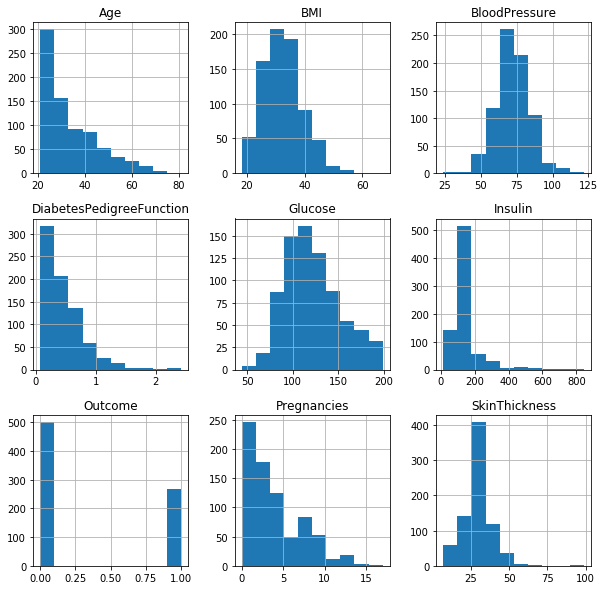

In [95]:
data.hist(figsize=(10,10))

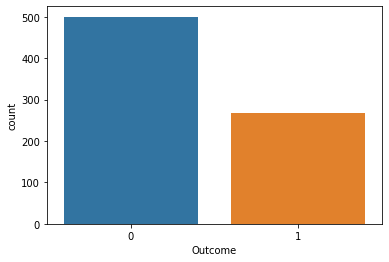

In [48]:
import seaborn as sns
sns.countplot(data['Outcome'],label='Count')

In [49]:
dataset_X = data.iloc[:,[0,1,2,3,4,5,6,7]].values
dataset_Y = data.iloc[:,8].values

In [130]:
dataset_X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [50]:
dataset_Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [51]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
dataset_scaled = sc.fit_transform(dataset_X)
dataset_scaled = pd.DataFrame(dataset_scaled)

X = dataset_scaled
Y = dataset_Y

In [52]:
X

,0,1,2,3,4,5,6,7
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.117647,0.503226,0.469388,0.217391,0.170130,0.380368,0.111870,0.100000
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.058824,0.529032,0.367347,0.240798,0.170130,0.243354,0.115713,0.433333


In [58]:
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [60]:
X_train.shape,X_test.shape,Y_train.shape, Y_test.shape

((614, 8), (154, 8), (614,), (154,))

# logistic regression

In [121]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train, Y_train)
print('training accuracy:-',reg.score(X_train, Y_train))
print('testing accuracy:-',reg.score(X_test, Y_test))

training accuracy:- 0.762214983713355
testing accuracy:- 0.7792207792207793


Text(15.0, 0.5, 'actual')

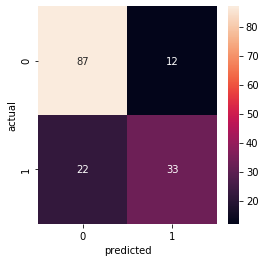

In [122]:
ypredicted=reg.predict(X_test)
cm=confusion_matrix(Y_test,ypredicted)
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

# support vector machine

In [103]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)
print('training accuracy:-',svc.score(X_train, Y_train))
print('training accuracy:-',svc.score(X_test, Y_test))

training accuracy:- 0.7654723127035831
training accuracy:- 0.7727272727272727


Text(15.0, 0.5, 'actual')

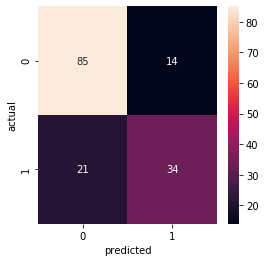

In [104]:
ypredicted=svc.predict(X_test)
cm=confusion_matrix(Y_test,ypredicted)
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

# decision tree

In [105]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
print('training accuracy:-',dtc.score(X_train, Y_train))
print('testing accuracy:-',dtc.score(X_test, Y_test))

training accuracy:- 1.0
testing accuracy:- 0.7142857142857143


Text(15.0, 0.5, 'actual')

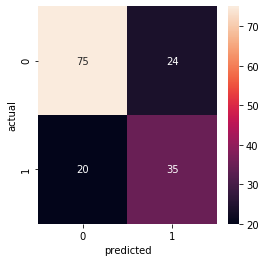

In [106]:
ypredicted=dtc.predict(X_test)
cm=confusion_matrix(Y_test,ypredicted)
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

# random forest

In [107]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,random_state=100)
rfc.fit(X_train, Y_train)
print('training accuracy:-',rfc.score(X_train, Y_train))
print('testing accuracy:-',rfc.score(X_test, Y_test))

training accuracy:- 1.0
testing accuracy:- 0.7792207792207793


Text(15.0, 0.5, 'actual')

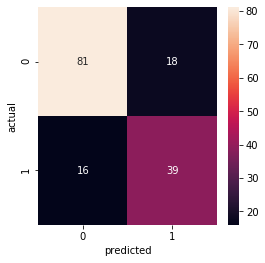

In [108]:
ypredicted=rfc.predict(X_test)
cm=confusion_matrix(Y_test,ypredicted)
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

# knn

In [109]:
from sklearn.neighbors import KNeighborsClassifier
trainacc,testacc=[],[]
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i,leaf_size=100)
    knn.fit(X_train, Y_train)
    trainacc.append(knn.score(X_train, Y_train))
    testacc.append(knn.score(X_test, Y_test)) 

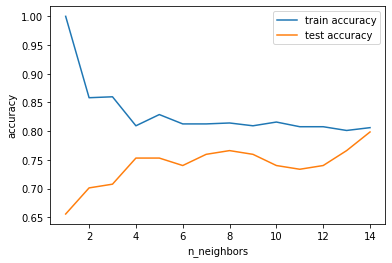

In [110]:
plt.plot(range(1,15),trainacc,label='train accuracy')
plt.plot(range(1,15),testacc,label='test accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.show()

In [111]:
knn=KNeighborsClassifier(n_neighbors=14,leaf_size=100)
knn.fit(X_train, Y_train)
print('training accuracy:-',knn.score(X_train, Y_train))
print('testing accuracy:-',knn.score(X_test, Y_test))

training accuracy:- 0.8061889250814332
testing accuracy:- 0.7987012987012987


Text(15.0, 0.5, 'actual')

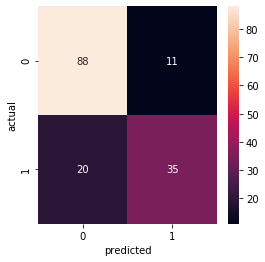

In [113]:
ypredicted=knn.predict(X_test)
cm=confusion_matrix(Y_test,ypredicted)
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

# deep learning:ANN[mlpclassifier]

In [127]:
from sklearn.neural_network import MLPClassifier
mlpc=MLPClassifier()
mlpc.fit(X_train, Y_train)
print('training accuracy:-',mlpc.score(X_train, Y_train))
print('testing accuracy:-',mlpc.score(X_test, Y_test))

training accuracy:- 0.7833876221498371
testing accuracy:- 0.7727272727272727


Text(15.0, 0.5, 'actual')

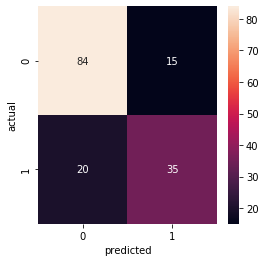

In [128]:
ypredicted=mlpc.predict(X_test)
cm=confusion_matrix(Y_test,ypredicted)
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')